In [240]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import scipy.cluster.hierarchy as sch 

import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cross_decomposition import CCA 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
from sklearn.cluster import AgglomerativeClustering  

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# import keras
# from keras.models import Sequential, Model
# from keras.layers import Dense
# from keras.optimizers import Adam

# ab nihilo import keras.functions



%cd "C:\Users\kwlei\Documents\GitHub\FINAL PROJECT\Health"


C:\Users\kwlei\Documents\GitHub\FINAL PROJECT\Health


In [241]:
load = "stateHealthZ.csv" 
H = pd.read_csv(load, low_memory=False) 

In [242]:
H.head()

,FIPS,ACES,ACESpgJail,AirPollute,AllDeterminants,AllOutcomes,Behaviors,BelowPov,CancerDeaths,CHF,...,subsMisuse,Suicide,underEmp,unEmp,unEmpAnnual,Uninsured,Vegetables,vioCrime,VoteReg,xsETOH
0,24,1.56,0.18,-0.21,-0.437,-0.383,-0.082,1.40,1.19,1.73,...,0.51,0.54,-0.29,0.98,0.00,0.30,-0.76,0.88,0.440,-1.53
1,3,0.96,0.74,-1.40,-0.027,0.101,-0.087,-1.14,-0.22,-1.00,...,1.90,2.00,2.00,1.20,2.00,1.45,0.00,2.00,0.167,-0.17
2,18,1.82,1.05,0.91,-0.187,0.039,0.004,0.91,-1.15,0.09,...,2.00,0.93,1.01,0.75,1.01,0.53,1.14,0.60,0.356,-0.35
3,10,1.76,1.90,-0.91,-0.478,-0.358,-0.202,1.25,1.58,2.00,...,1.35,1.41,0.00,0.15,-0.13,-0.23,1.90,1.03,-1.758,-0.83
4,46,-1.52,-1.16,2.00,0.272,0.127,0.200,0.46,-1.13,-0.91,...,-0.47,-0.73,0.80,1.20,0.38,-0.53,-0.38,0.42,-1.130,-0.21


In [243]:
H.describe()

,FIPS,ACES,ACESpgJail,AirPollute,AllDeterminants,AllOutcomes,Behaviors,BelowPov,CancerDeaths,CHF,...,subsMisuse,Suicide,underEmp,unEmp,unEmpAnnual,Uninsured,Vegetables,vioCrime,VoteReg,xsETOH
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.0000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,25.50000,0.301400,0.151200,-0.694200,0.046740,-0.02368,-0.017580,-0.014200,0.156800,0.1678,...,0.380200,0.487600,-0.191400,0.012600,-0.168600,-0.215000,0.135200,-0.138800,0.210060,-0.04700
std,14.57738,0.994587,0.982362,0.834853,0.352413,0.17786,0.127628,0.967939,0.969131,0.9016,...,0.947963,0.892411,0.928618,0.974101,0.913285,0.951631,0.788122,0.871172,0.944059,0.96482
min,1.00000,-1.520000,-1.510000,-2.000000,-0.656000,-0.38300,-0.309000,-1.860000,-2.000000,-1.6400,...,-1.860000,-1.270000,-2.000000,-2.000000,-1.770000,-1.980000,-0.760000,-1.700000,-2.000000,-2.00000
25%,13.25000,-0.562500,-0.560000,-1.242500,-0.241500,-0.12775,-0.092250,-0.790000,-0.450000,-0.4500,...,-0.200000,-0.060000,-0.992500,-0.845000,-0.760000,-1.012500,-0.380000,-0.905000,-0.470750,-0.62000
50%,25.50000,0.290000,0.180000,-0.700000,0.068000,0.01450,-0.012500,-0.095000,0.065000,0.0450,...,0.380000,0.440000,-0.150000,0.190000,-0.130000,-0.230000,0.000000,-0.230000,0.230000,-0.01500
75%,37.75000,1.240000,0.885000,-0.210000,0.336500,0.11700,0.057750,0.720000,0.685000,0.7300,...,1.170000,1.060000,0.402500,0.830000,0.380000,0.322500,0.380000,0.427500,1.041000,0.40250
max,50.00000,2.000000,2.000000,2.000000,0.687000,0.23400,0.288000,2.000000,2.000000,2.0000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000


In [244]:
load = "JailGuns.csv" 
V = pd.read_csv(load, low_memory=False) 

In [247]:
VH = pd.merge(H, V, how="left", on=["FIPS", "FIPS"])

In [248]:
VH.describe()

,FIPS,ACES,ACESpgJail,AirPollute,AllDeterminants,AllOutcomes,Behaviors,BelowPov,CancerDeaths,CHF,...,Vegetables,vioCrime,VoteReg,xsETOH,gunOwnerRate,homicideRate,gunDeathRate,suiRate,gunSuiRate,gunPctSuicide
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.0000,...,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,0.301400,0.151200,-0.694200,0.046740,-0.02368,-0.017580,-0.014200,0.156800,0.1678,...,0.135200,-0.138800,0.210060,-0.04700,0.361560,4.768000,11.404000,13.686000,7.880000,0.510400
std,14.57738,0.994587,0.982362,0.834853,0.352413,0.17786,0.127628,0.967939,0.969131,0.9016,...,0.788122,0.871172,0.944059,0.96482,0.121936,2.364542,4.072003,3.050795,2.553669,0.128189
min,1.00000,-1.520000,-1.510000,-2.000000,-0.656000,-0.38300,-0.309000,-1.860000,-2.000000,-1.6400,...,-0.760000,-1.700000,-2.000000,-2.00000,0.104000,1.330000,3.200000,7.400000,3.000000,0.130000
25%,13.25000,-0.562500,-0.560000,-1.242500,-0.241500,-0.12775,-0.092250,-0.790000,-0.450000,-0.4500,...,-0.380000,-0.905000,-0.470750,-0.62000,0.302500,2.512500,9.025000,11.250000,6.125000,0.462500
50%,25.50000,0.290000,0.180000,-0.700000,0.068000,0.01450,-0.012500,-0.095000,0.065000,0.0450,...,0.000000,-0.230000,0.230000,-0.01500,0.352500,4.760000,11.150000,14.100000,8.200000,0.530000
75%,37.75000,1.240000,0.885000,-0.210000,0.336500,0.11700,0.057750,0.720000,0.685000,0.7300,...,0.380000,0.427500,1.041000,0.40250,0.442750,6.430000,14.800000,15.500000,9.600000,0.607500
max,50.00000,2.000000,2.000000,2.000000,0.687000,0.23400,0.288000,2.000000,2.000000,2.0000,...,2.000000,2.000000,2.000000,2.00000,0.613000,12.130000,19.200000,23.400000,15.200000,0.690000


In [230]:
VH.describe()

,FIPS,AirPollute,AllDeterminants,AllOutcomes,Behaviors,BelowPov,CancerDeaths,CHF,ChildPov,chImunize,...,Vegetables,vioCrime,VoteReg,xsETOH,gunOwnerRate,homicideRate,gunDeathRate,suiRate,gunSuiRate,gunPctSuicide
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,-0.694200,0.046740,-0.02368,-0.017580,-0.014200,0.156800,0.1678,-0.178400,0.243800,...,0.135200,-0.138800,0.210060,-0.04700,0.361560,4.768000,11.404000,13.686000,7.880000,0.510400
std,14.57738,0.834853,0.352413,0.17786,0.127628,0.967939,0.969131,0.9016,0.996109,0.946139,...,0.788122,0.871172,0.944059,0.96482,0.121936,2.364542,4.072003,3.050795,2.553669,0.128189
min,1.00000,-2.000000,-0.656000,-0.38300,-0.309000,-1.860000,-2.000000,-1.6400,-1.810000,-1.180000,...,-0.760000,-1.700000,-2.000000,-2.00000,0.104000,1.330000,3.200000,7.400000,3.000000,0.130000
25%,13.25000,-1.242500,-0.241500,-0.12775,-0.092250,-0.790000,-0.450000,-0.4500,-0.920000,-0.390000,...,-0.380000,-0.905000,-0.470750,-0.62000,0.302500,2.512500,9.025000,11.250000,6.125000,0.462500
50%,25.50000,-0.700000,0.068000,0.01450,-0.012500,-0.095000,0.065000,0.0450,-0.300000,0.060000,...,0.000000,-0.230000,0.230000,-0.01500,0.352500,4.760000,11.150000,14.100000,8.200000,0.530000
75%,37.75000,-0.210000,0.336500,0.11700,0.057750,0.720000,0.685000,0.7300,0.465000,1.042500,...,0.380000,0.427500,1.041000,0.40250,0.442750,6.430000,14.800000,15.500000,9.600000,0.607500
max,50.00000,2.000000,0.687000,0.23400,0.288000,2.000000,2.000000,2.0000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.00000,0.613000,12.130000,19.200000,23.400000,15.200000,0.690000


In [ ]:
# averages_df = pd.merge(data1, date2.mean(), how="left", on=["key_value", "key_value"]) 

In [11]:
# subs = H.sample(n=25) 
# #subset = ###subset.#XXXX#iloc#[XXXXX]
# print(subs.head())

#  !!!! only do this once.  Once data is cleaned, don't use iloc 

# also, why bother training?

In [12]:
# subs.info()

In [190]:
# from sklearn.cluster import KMeans 
clusters = 1
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1123.07618864


In [184]:
# from sklearn.cluster import KMeans 
clusters = 2
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 


[1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1]
728.7948873333333


In [185]:
# from sklearn.cluster import KMeans 
clusters = 3
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 


[0 1 1 1 1 0 1 2 2 1 1 1 0 1 1 2 2 1 2 2 0 1 0 1 0]
621.2628548333333


In [186]:
# from sklearn.cluster import KMeans 
clusters = 4
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 


[3 2 1 2 2 3 1 0 0 2 1 2 3 2 1 0 0 2 0 3 3 1 3 2 3]
509.77510743571435


In [187]:
# from sklearn.cluster import KMeans 
clusters = 5
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 


[2 1 4 1 1 2 4 0 0 1 4 1 2 1 4 0 0 1 0 3 2 4 0 1 3]
447.0398034666667


In [188]:
# from sklearn.cluster import KMeans 
clusters = 6
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[1 0 4 0 5 1 3 2 2 0 4 5 1 0 4 2 2 0 2 2 1 4 1 0 2]
419.55214892857146


In [189]:
# from sklearn.cluster import KMeans 
clusters = 7
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[2 4 5 4 0 2 5 1 1 4 3 0 2 4 5 1 1 4 1 6 2 5 1 4 6]
355.21271916666666


In [191]:
# from sklearn.cluster import KMeans 
clusters = 8
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[6 7 2 7 3 6 2 1 0 7 2 3 6 0 2 1 5 7 5 4 6 2 1 7 4]
331.25930171666664


In [192]:
# from sklearn.cluster import KMeans 
clusters = 9
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[6 8 1 8 7 0 1 3 2 5 8 7 0 5 1 3 2 8 2 4 0 1 6 5 4]
301.3282065833333


In [193]:
# from sklearn.cluster import KMeans 
clusters = 10
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[9 6 3 6 4 9 3 1 8 0 6 4 2 0 3 0 8 6 7 5 2 3 9 0 5]
272.88320541666667


In [194]:
# from sklearn.cluster import KMeans 
clusters = 11
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[ 1  2  6  2  7  1  4 10  9  2  0  7  1  2  6  3  9  2  5  9  1  6  3  2
  8]
243.86882091666666


In [195]:
# from sklearn.cluster import KMeans 
clusters = 12
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[ 9  1  4  1  5  9  8  6  2  7 10  5  3  7  4  7  2  1  2  0  9  4  9  7
 11]
218.0934125


In [196]:
# from sklearn.cluster import KMeans 
clusters = 13
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(subs) 
print(kmeans.labels_)
print(kmeans.inertia_) 

[ 1  8  8  8  6 12  9  7  5  4 11  6 12  0  3  0 10  8 10  2 12  3  1  4
  2]
198.54927149999997


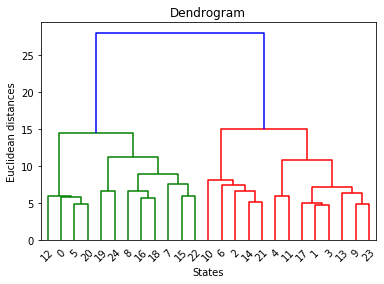

In [197]:
dendrogram = sch.dendrogram(sch.linkage(subs, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Euclidean distances')
plt.show()

In [142]:
# from sklearn.cluster import KMeans 
clusters = 1
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_) 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
2833.74558954


In [155]:
# from sklearn.cluster import KMeans 
clusters = 2
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_) 


[0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1
 1 1 0 1 0 0 1 1 1 1 0 1 1]
1972.8338713267653


In [144]:
clusters = 3
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_) 
#print(kmeanModel.cluster_centers_)

[1 0 1 1 2 0 2 1 1 1 2 0 2 1 0 0 1 1 0 2 2 1 0 1 1 0 0 1 0 2 1 2 1 0 1 1 0
 2 2 1 0 1 1 0 0 2 0 1 0 0]
1704.1011547388166


In [145]:
clusters = 4
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_) 
#print(kmeanModel.cluster_centers_)

[3 0 1 3 2 0 2 1 1 1 2 0 2 1 0 0 3 3 0 2 2 1 0 3 1 0 0 1 0 2 1 2 1 0 1 3 2
 1 2 1 0 3 1 0 0 2 2 3 0 0]
1504.8024638154761


In [146]:
clusters = 5
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(X) 
print(kmeans.labels_)
print(kmeans.inertia_)
#print(kmeanModel.cluster_centers_)

[4 1 2 4 3 1 3 2 2 2 3 1 3 2 0 0 4 4 0 3 3 2 0 4 2 1 0 2 0 3 2 3 2 0 2 4 1
 2 3 2 0 4 2 1 0 3 1 4 0 1]
1370.361863382143


In [147]:
clusters = 6
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_)
#print(kmeanModel.cluster_centers_)

[1 5 3 1 2 0 2 3 3 3 2 5 2 3 4 4 1 1 4 2 2 3 4 1 3 5 4 3 4 2 3 2 3 4 3 1 2
 3 2 3 4 1 3 0 4 4 2 1 4 5]
1310.047665823052


In [148]:
clusters = 7
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_)
#print(kmeanModel.cluster_centers_)

[5 3 0 5 2 6 2 4 0 0 2 3 2 4 1 1 5 5 4 2 2 4 1 5 4 3 1 0 1 2 0 2 0 1 4 5 6
 4 2 0 1 5 0 6 6 1 6 5 1 3]
1198.5944293496032


In [149]:
clusters = 8
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(X) 
print(kmeans.labels_)
print(kmeans.inertia_)
#print(kmeanModel.cluster_centers_)

[6 4 7 1 0 5 0 3 3 7 0 4 0 3 2 2 6 6 5 0 0 3 2 6 3 4 2 7 5 0 7 0 3 2 3 1 5
 3 0 3 2 1 7 4 5 2 5 1 2 4]
1150.736539911111


In [150]:
clusters = 9
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_)
#print(kmeanModel.cluster_centers_)

[3 4 8 3 7 5 7 6 6 6 2 4 7 6 2 2 3 3 1 7 7 6 2 3 6 4 2 8 1 7 8 7 6 2 6 3 5
 6 7 6 4 3 0 5 1 2 5 3 2 4]
1113.2787098166668


In [156]:
clusters = 10
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_)
# print(kmeanModel.cluster_centers_)

[0 6 5 7 3 9 4 1 5 1 4 6 3 1 2 2 7 0 8 3 4 1 9 0 1 6 2 5 8 3 5 4 1 2 1 7 5
 1 4 1 2 7 1 9 8 3 9 7 2 6]
1023.3914436499999


In [152]:
clusters = 11
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_)

[ 7  5  6  7  4  0 10  1  8  8 10  5  4  1  3  3  7  7  2  4 10  1  3  7
  1  5  3  6  2 10  6  4  8  3  1  7  9  1 10  8  3  7  8  0  2  4  9  7
  3  5]
958.8203603988095


In [153]:
clusters = 12
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_)

[10  6  9  4  5  0 11  1  2  2 11  8 11  1  3  8  4 10  7 11 11  1  0 10
  1  8  3  9  7 11  9  5  2  3  1  4  9  1 11  2  3  4  2  0  7 11  0  4
  3  8]
907.5329905166666


In [154]:
clusters = 13
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(H) 
print(kmeans.labels_)
print(kmeans.inertia_)

[ 7  2  1 11  8  8  0  1  1  1 12 10  0  9  4  4  3  7  5  0  0  9  4  7
  9 10  4  1  5  0  6  0  1  4  9 11  8  9  0  1  4 11  1 10  5  4  8  3
  4 10]
855.8784815238096


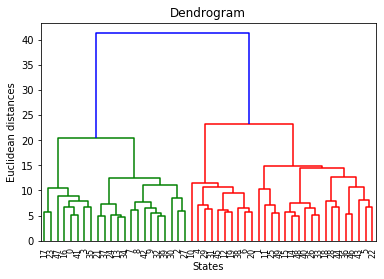

In [158]:
dendrogram = sch.dendrogram(sch.linkage(H, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Euclidean distances')
plt.show()

In [159]:
H = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')